In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/loan approval.zip/load train data.csv")
test_df=pd.read_csv("/content/drive/MyDrive/loan approval.zip/loan test data.csv")

In [ ]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_df.columns,test_df.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [ ]:
train_df.shape,test_df.shape

((614, 13), (367, 12))

In [ ]:
train_df.info()
print('\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   

In [ ]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
data = pd.concat([train_df,test_df])

In [ ]:
data.drop('Loan_ID', inplace=True, axis='columns')

In [ ]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

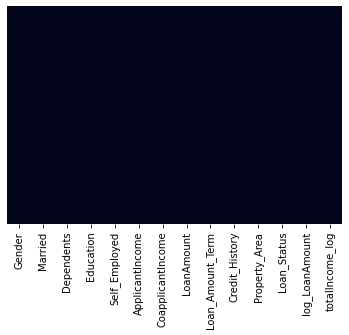

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False) 
plt.show()

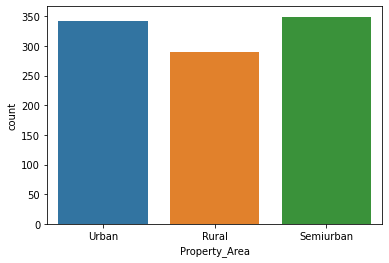

In [ ]:
sns.countplot(x="Property_Area",data=data)
plt.show()

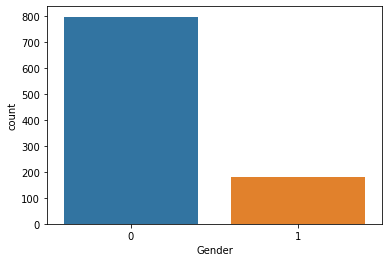

In [ ]:
sns.countplot(x="Gender",data=data)

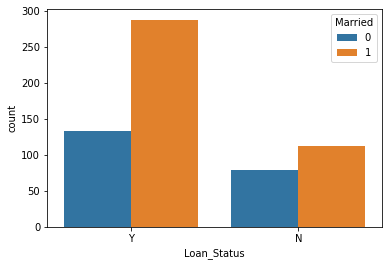

In [ ]:
sns.countplot(x="Loan_Status",hue="Married",data=data)

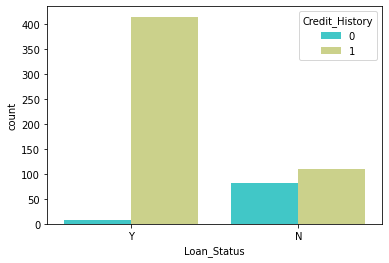

In [ ]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=data,palette = "rainbow")
plt.show()

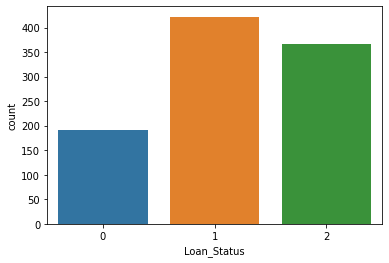

In [125]:
sns.countplot(x="Loan_Status",data=data)

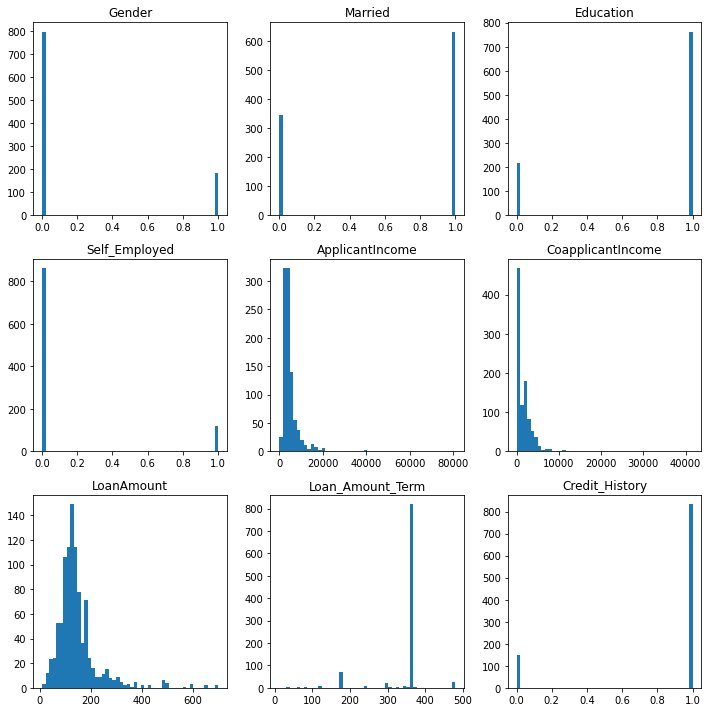

In [ ]:
data.hist(bins=50,figsize=(10,10),grid=False)
plt.tight_layout()
plt.show()

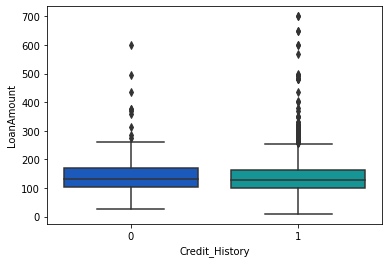

In [ ]:
sns.boxplot(x="Credit_History",y="LoanAmount",data=data,palette="winter")

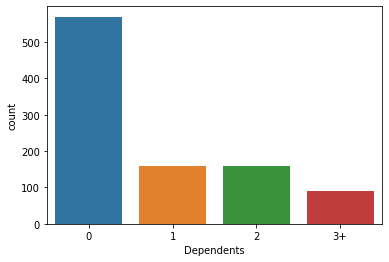

In [ ]:
sns.countplot(x="Dependents",data=data)
plt.show()

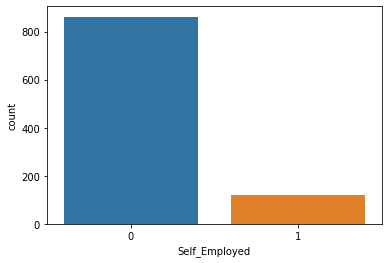

In [ ]:
sns.countplot(x="Self_Employed",data=data)
plt.show()

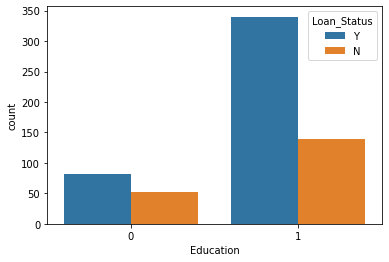

In [ ]:
sns.countplot(x="Education",hue="Loan_Status",data=data)
plt.show()

In [ ]:
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)

In [ ]:
data.Gender.fillna("Male",inplace=True)

In [ ]:
data.Dependents.fillna('0',inplace=True)

In [ ]:
data.Self_Employed.fillna("No",inplace=True)
data.Credit_History.fillna(0.0,inplace=True)

In [ ]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0],inplace=True)
data.Married.fillna(data.Married.mode()[0],inplace = True)

In [ ]:
data["log_LoanAmount"] = np.log(data.LoanAmount)

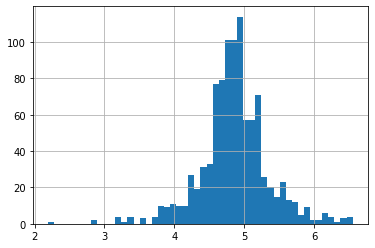

In [ ]:
data.log_LoanAmount.hist(bins=50)
plt.show()

In [ ]:
data["totalIncome_log"] = np.log(data.ApplicantIncome + data.CoapplicantIncome)

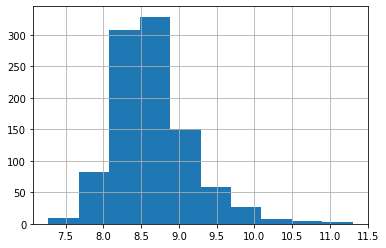

In [ ]:
data.totalIncome_log.hist()

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,0,0,0,1,0,5849,0.0,144.386565,360.0,1,Urban,Y,4.972494,8.674026
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,Rural,N,4.852030,8.714568
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,Urban,Y,4.189655,8.006368
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,Urban,Y,4.787492,8.505323
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,Urban,Y,4.948760,8.699515


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    object 
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  log_LoanAmount     981 non-null    float64
 13  totalIncome_log    981 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 147.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_column = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in categorical_column:
    data[i] = le.fit_transform(data[i])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,0,0,0,1,0,5849,0.0,144.386565,360.0,1,2,1,4.972494,8.674026
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0,4.852030,8.714568
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1,4.189655,8.006368
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1,4.787492,8.505323
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1,4.948760,8.699515


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    int64  
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    int64  
 12  log_LoanAmount     981 non-null    float64
 13  totalIncome_log    981 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 147.2 KB


In [ ]:
train = data
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,0,0,0,1,0,5849,0.0,144.386565,360.0,1,2,1,4.972494,8.674026
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0,4.852030,8.714568
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1,4.189655,8.006368
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1,4.787492,8.505323
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1,4.948760,8.699515


In [ ]:
train.Loan_Status.value_counts()

1    422
2    367
0    192
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.utils import resample
data_major = train[train.Loan_Status==1]
data_minor = train[train.Loan_Status==0]
data_upscale = resample(data_minor,replace= True,n_samples=422)
train=pd.concat([data_major,data_upscale])

In [ ]:
train.shape

(844, 14)

In [ ]:
def roc_curve_do(c_name,classifier,x_test,y_test):
    probs = classifier.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs)
    plt.plot(fper, tper)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(c_name))
  # show the plot
    plt.show()

def kfold(classifier,X,Y,cv):
    score=cross_val_score(classifier,X,Y,cv=cv)
    print("Individual Score:",score)
    print("Mean Score:",score.mean()*100,"%")
  # plot
    plt.plot(np.arange(cv), score, 'o-', linewidth=1)
    plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
    plt.xlabel('number of Folds')
    plt.ylabel('Accuracy score')
    plt.show()

def all_score(classifier,x_test,y_test,x_train,y_train):
    predict=classifier.predict(x_test)
    print("testing accuracy:",accuracy_score(y_test,predict))
    print("training accuracy:",accuracy_score(y_train,classifier.predict(x_train)))
    print(confusion_matrix(y_test,predict))
    print("Classification report:\n",classification_report(y_test,predict))

In [ ]:
xtrain = train.drop(["Loan_Status"],axis=1)
ytrain = train["Loan_Status"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2)

# **LOGISTIC** **REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

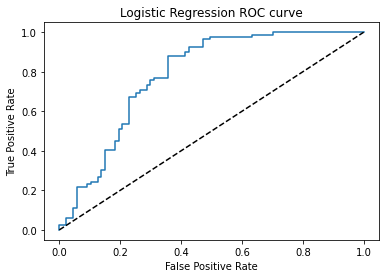

Individual Score: [0.69230769 0.67455621 0.75147929 0.65088757 0.72619048]
Mean Score: 69.9084249084249 %


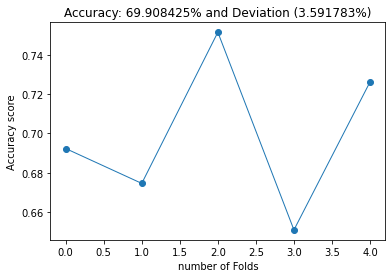

testing accuracy: 0.7455621301775148
training accuracy: 0.725925925925926
[[56 31]
 [12 70]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        87
           1       0.69      0.85      0.77        82

    accuracy                           0.75       169
   macro avg       0.76      0.75      0.74       169
weighted avg       0.76      0.75      0.74       169



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
roc_curve_do("Logistic Regression",model,x_test,y_test)
kfold(model,xtrain,ytrain,5)
all_score(model,x_test,y_test,x_train,y_train)

# RANDOM **FOREST** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

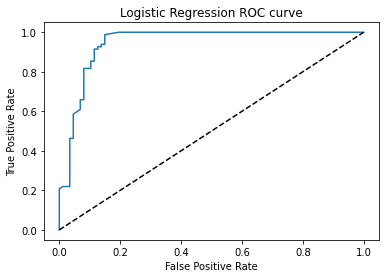

Individual Score: [0.92307692 0.8816568  0.9112426  0.85798817 0.93452381]
Mean Score: 90.1697661313046 %


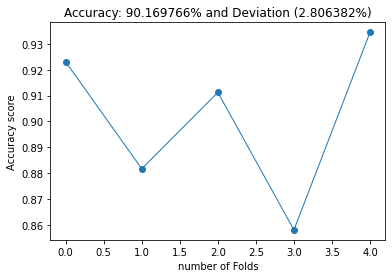

testing accuracy: 0.893491124260355
training accuracy: 1.0
[[76 11]
 [ 7 75]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        87
           1       0.87      0.91      0.89        82

    accuracy                           0.89       169
   macro avg       0.89      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169



In [ ]:
roc_curve_do("Logistic Regression",model1,x_test,y_test)
kfold(model1,xtrain,ytrain,5)
all_score(model1,x_test,y_test,x_train,y_train)

In [ ]:
parameters =  ['Loan_ID' ,'ApplicantIncome' ,'CoapplicantIncome' ,'LoanAmount' 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','log_LoanAmount','totalIncome_log']
featimp = pd.Series(model1.feature_importances_, index=parameters).sort_values(ascending=False)
print (featimp)

Credit_History       0.205033
totalIncome_log      0.146696
Dependents           0.133203
log_LoanAmount       0.118179
Self_Employed        0.117868
Education            0.090381
CoapplicantIncome    0.037335
Property_Area        0.036632
Loan_Amount_Term     0.032646
LoanAmountGender     0.024082
ApplicantIncome      0.023327
Loan_ID              0.017405
Married              0.017214
dtype: float64


In [ ]:
new_train = train.drop(['Property_Area','Married','Education','Gender','Self_Employed','Dependents','Loan_Amount_Term'],axis=1)

In [ ]:
new_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,log_LoanAmount,totalIncome_log
0,5849,0.0,144.386565,1,1,4.972494,8.674026
2,3000,0.0,66.000000,1,1,4.189655,8.006368
3,2583,2358.0,120.000000,1,1,4.787492,8.505323
4,6000,0.0,141.000000,1,1,4.948760,8.699515
5,5417,4196.0,267.000000,1,1,5.587249,9.170872


In [ ]:
new_xtrain = new_train.drop(["Loan_Status"],axis=1)
new_ytrain = new_train["Loan_Status"]
new_xtrain.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,log_LoanAmount,totalIncome_log
0,5849,0.0,144.386565,1,4.972494,8.674026
2,3000,0.0,66.000000,1,4.189655,8.006368
3,2583,2358.0,120.000000,1,4.787492,8.505323
4,6000,0.0,141.000000,1,4.948760,8.699515
5,5417,4196.0,267.000000,1,5.587249,9.170872


In [ ]:
x_newtrain,x_newtest,y_newtrain,y_newtest = train_test_split(new_xtrain,new_ytrain,test_size=0.2)

In [ ]:
model2 = RandomForestClassifier(n_estimators=150)
model2.fit(x_newtrain,y_newtrain)

RandomForestClassifier(n_estimators=150)

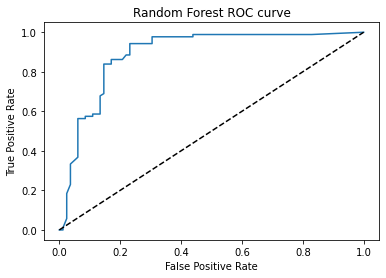

Individual Score: [0.88757396 0.88757396 0.92307692 0.86982249 0.89285714]
Mean Score: 89.21808960270499 %


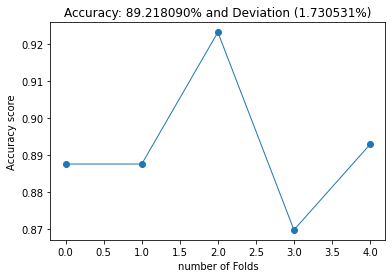

testing accuracy: 0.8224852071005917
training accuracy: 1.0
[[70 12]
 [18 69]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        82
           1       0.85      0.79      0.82        87

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



In [ ]:
roc_curve_do("Random Forest",model2,x_newtest,y_newtest)
kfold(model2,new_xtrain,new_ytrain,5)
all_score(model2,x_newtest,y_newtest,x_newtrain,y_newtrain)

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt_classifier.predict(x_test)
dt_y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
dt_classifier.score(x_train,y_train)

1.0

In [ ]:
confusion_matrix(y_test,dt_y_pred)

array([[77, 10],
       [16, 66]])

In [ ]:
accuracy_score(y_test,dt_y_pred)

0.8461538461538461

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_test,dt_y_pred)

0.868421052631579

In [ ]:
recall_score(y_test,dt_y_pred)

0.8048780487804879

In [ ]:
f1_score(y_test,dt_y_pred)

0.8354430379746836